<a href="https://colab.research.google.com/github/SilasEmma/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data exploration, model development on Titanic datasets.
Building a logistic regression algorithm on the titanic datasets to predict number of survival.

In [178]:
# importing relevant libraries

# utilities tools 
import io
from google.colab import files
# data manipulation and numeric computation library
import pandas as pd
import numpy as np
# visualization tools
import seaborn as sns
from matplotlib import pyplot as plt
# model development tools
# using logistic for binary classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, validation_curve
# accuracy score for measuring model performance
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [112]:
# uploading titanic datasets from local machine to  colab
upload = files.upload()

Saving titanic_data.csv to titanic_data (1).csv


In [113]:
# converting to 
tit = pd.read_csv(io.BytesIO(upload['titanic_data.csv']))

In [114]:
# returns the first five row of each column
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
# return the datatype 
tit.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [116]:
# return the number of column with missing value
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Data Analysis**

Using visualization tools to discover hidden insight or pattern.





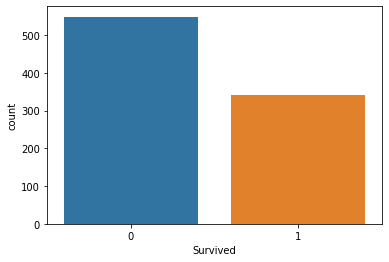

In [117]:
# plotting Survival, where 0 implies numbers of death and 1 numbers of survival
sns.countplot(x='Survived', data=tit)

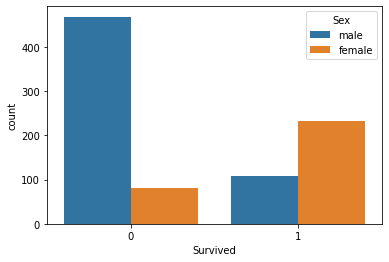

In [118]:
# plotting survival by gender, with more female survival than male and more male death than female
sns.countplot(x='Survived', hue='Sex', data=tit)

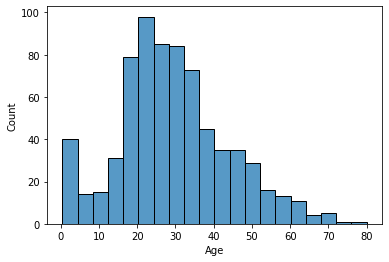

In [119]:
# plotting age using histogram, the titanic ship contain more people with age range 19-45years old.
sns.histplot(data=tit, x='Age')

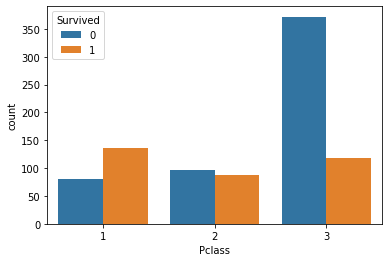

In [120]:
# plotting pclass by survival, where passenger in the 3rd class have the highest death rate,
# passenger in the 1st class have the least death and highest survival rate.
sns.countplot(x='Pclass', hue='Survived', data=tit)

**Data Wrangling**

Cleaning messy data, selecting relevant data, transforming data for analysis and building machine learning model.



In [121]:
# viewing titanic dataset
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
# drop inrelevant columns
tit.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [123]:
#
tit.dropna(inplace=True)

In [124]:
tit.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S


In [125]:
# converting the selected categorical columns into numeric, also known as one hot encoding
sex = pd.get_dummies(tit['Sex'], drop_first=True)
pcl = pd.get_dummies(tit['Pclass'], drop_first=True)
emb = pd.get_dummies(tit['Embarked'], drop_first=True)

In [126]:
tit = pd.concat([tit,sex,pcl,emb], axis=1)
tit.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,male,2,3,Q,S
1,1,1,female,38.0,1,0,71.2833,C85,C,0,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,C123,S,0,0,0,0,1
6,0,1,male,54.0,0,0,51.8625,E46,S,1,0,0,0,1
10,1,3,female,4.0,1,1,16.7000,G6,S,0,0,1,0,1
11,1,1,female,58.0,0,0,26.5500,C103,S,0,0,0,0,1


In [145]:
# dropping the following colums
tit.drop(columns=['Sex', 'Embarked', 'Pclass', 'Cabin'], axis=1, inplace=True)

In [146]:
tit.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
1,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,0,1
6,0,54.0,0,0,51.8625,1,0,0,0,1
10,1,4.0,1,1,16.7000,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,0,0,1


**Model Development**

> Logistics Regression is being used here to build a simple model that will predict survival



In [147]:
X = tit.drop('Survived', axis=1)
y = tit['Survived']

In [148]:
# splitting dataset into training set and testing set.
# 75% of the dataset is used for training, while 35% for testing with 42% random state
(x_train, x_test, y_train, y_test) = train_test_split(X, y, test_size=0.35, random_state=42)

In [174]:
# initializing model and fit model for training
model = LogisticRegression(max_iter=300, penalty='l2', l1_ratio=0)
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [175]:
y_hat = model.predict(x_test)

In [163]:
classification_report(y_test, y_hat)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        23\n           1       0.65      1.00      0.79        42\n\n    accuracy                           0.65        65\n   macro avg       0.32      0.50      0.39        65\nweighted avg       0.42      0.65      0.51        65\n'

In [176]:
confusion_matrix(y_test, y_hat)

array([[15,  8],
       [11, 31]])

In [177]:
accuracy_score(y_test, y_hat)

0.7076923076923077

The model have 70% **accuracy**